In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
# To make the number from random generator function remain the same
np.random.seed(0)

In [4]:
# X is two dimension array that contains coordinates each sample
# y is one dimension array that contains the label of each sample
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

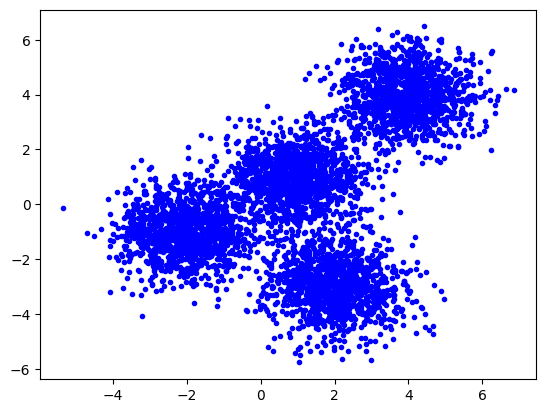

In [5]:
# Visualize the data from X (0 for x coordinate, 1 for y coordinate, marker is opsional to indicate the data visualization is point)
plt.scatter(X[:, 0], X[:, 1], marker='.', color="blue")

## Setting K-Means

In [6]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [7]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [13]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [14]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

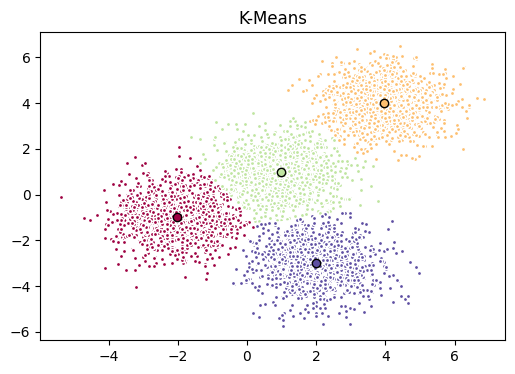

In [20]:
# To make canvas with size 6x4 inch
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroids
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('K-Means')

plt.show()